In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

In [6]:

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [7]:
type(data)

dict

In [8]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978378e+07,1.978378e+07,False,NaN,1,NaN,NaN,None,2024-11-18T05:49:00.000Z,90641.557234,4.345718e+10,-3.6881,0.098494,0.133572,12.032479,32.541114,46.315607,48.367890,1.793232e+12,58.6632,1.903473e+12,None,2024-11-18T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:51:58.252700
1,1027,Ethereum,ETH,ethereum,9562,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204240e+08,1.204240e+08,True,NaN,2,NaN,NaN,None,2024-11-18T05:49:00.000Z,3108.389328,2.515080e+10,-13.8772,0.269298,0.172413,-0.950676,17.465327,29.045694,15.939380,3.743247e+11,12.2455,3.743247e+11,None,2024-11-18T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:51:58.252700
2,825,Tether USDt,USDT,tether,103750,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.275392e+11,1.298257e+11,True,NaN,3,NaN,NaN,None,2024-11-18T05:49:00.000Z,1.000107,1.193304e+11,-16.0809,-0.003615,0.010098,-0.045346,0.033849,-0.018227,-0.065023,1.275528e+11,4.1739,1.298395e+11,None,2024-11-18T05:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 12:51:58.252700
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.746032e+08,5.885760e+08,True,NaN,4,NaN,NaN,None,2024-11-18T05:50:00.000Z,242.875200,8.571906e+09,20.3674,0.502856,3.003160,18.165752,56.924469,75.505667,64.855560,1.152693e+11,3.7720,1.429505e+11,None,2024-11-18T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:51:58.252700
4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440987e+08,1.440987e+08,False,NaN,5,NaN,NaN,None,2024-11-18T05:50:00.000Z,623.852947,2.257039e+09,-4.7113,-0.265687,-0.189531,0.156485,4.281118,11.394932,9.093744,8.989641e+10,2.9417,8.989641e+10,None,2024-11-18T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:51:58.252700
5,52,XRP,XRP,xrp,1430,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-18T05:50:00.000Z,1.176151,1.106970e+10,-53.0688,3.826851,15.108278,103.864293,115.135181,100.826497,93.527082,6.695975e+10,2.1906,1.176151e+11,None,2024-11-18T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:51:58.252700
6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468382e+11,1.468382e+11,True,NaN,7,NaN,NaN,None,2024-11-18T05:49:00.000Z,0.370753,6.940036e+09,-16.4360,-0.717521,5.699578,31.445579,157.954905,256.341944,252.987718,5.444071e+10,1.7810,5.444071e+10,None,2024-11-18T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 12:51:58.252700
7,3408,USDC,USDC,usd-coin,23135,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.712443e+10,3.712443e+10,False,NaN,8,NaN,NaN,None,2024-11-18T05:50:00.000Z,1.000162,7.361285e+09,-5.3772,0.026337,0.024923,0.018315,0.027831,0.031596,-0.008308,3.713046e+10,1.2150,3.713046e+10,None,2024-11-18T05:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-18 12:51:58.252700
8,2010,Cardano,ADA,cardano,1352,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e

In [10]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return  # Thoát nếu có lỗi

    # Chuẩn hóa dữ liệu JSON và thêm cột timestamp
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')

    # Kết hợp dữ liệu mới vào DataFrame hiện tại
    global df
    df = pd.concat([df, df2], ignore_index=True)
     # Đường dẫn lưu file CSV
    csv_file = r'D:\project database\API.csv'

    # Kiểm tra file đã tồn tại hay chưa, sau đó lưu dữ liệu
    if not os.path.isfile(csv_file):
        # Ghi dữ liệu lần đầu (bao gồm tiêu đề cột)
        df.to_csv(csv_file, index=False)
    else:
        # Thêm dữ liệu vào file (không ghi lại tiêu đề)
        df.to_csv(csv_file, mode='a', header=False, index=False)


In [11]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print(f'API Runner completed iteration {i + 1}')
    sleep(60)  

API Runner completed iteration 1


KeyboardInterrupt: 

In [12]:
# Đọc lại dữ liệu từ file CSV (nếu cần)
csv_file = r'D:\project database\API.csv'
df = pd.read_csv(csv_file)
print(df.head())

     id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11800   
1  1027     Ethereum    ETH  ethereum              9561   
2   825  Tether USDt   USDT    tether            103707   
3  5426       Solana    SOL    solana               787   
4  1839          BNB    BNB       bnb              2282   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2020-04-10T00:00:00.000Z   
4  2017-07-25T00:00:00.000Z   

                                                tags  max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value...  21000000.0   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...         NaN   
2  ['stablecoin', 'asset-backed-stablecoin', 'ava...         NaN   
3  ['pos', 'platform', 'solana-ecosystem', 'cms-h...         NaN   
4  ['marketplace', 'centralized-exchange', 'payme...         NaN   

   circulating_supply  total_supply  infinite_sup

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19783550.00000,19783550.00000,False,NaN,1,NaN,NaN,NaN,2024-11-17T17:23:00.000Z,90343.95375,42680432402.34866,-25.28110,0.14913,-0.57503,13.20818,31.46652,51.42066,53.49757,1787324126243.91968,59.08190,1897223028785.13989,NaN,2024-11-17T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 00:24:10.508485,NaN
1,1027,Ethereum,ETH,ethereum,9561,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120422508.55190,120422508.55190,True,NaN,2,NaN,NaN,NaN,2024-11-17T17:23:00.000Z,3090.50372,26317194316.76340,-12.79500,0.05091,-2.00923,-3.84118,16.76189,34.59842,18.91494,372166210885.73206,12.30230,372166210885.72998,NaN,2024-11-17T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 00:24:10.508485,NaN
2,825,Tether USDt,USDT,tether,103707,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,127537303558.54820,129825664180.75980,True,NaN,3,NaN,NaN,NaN,2024-11-17T17:22:00.000Z,1.00009,129572121646.72186,-12.03120,0.00669,-0.01652,-0.07453,0.01581,0.00232,-0.01873,127549013801.69560,4.21520,129837584537.02000,NaN,2024-11-17T17:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 00:24:10.508485,NaN
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,472119875.45357,588589590.62148,True,NaN,4,NaN,NaN,NaN,2024-11-17T17:22:00.000Z,232.39094,9154714955.75242,68.10030,-0.57904,8.33342,10.01153,49.28137,81.29441,60.94617,109716383283.98816,3.62590,136782890276.64999,NaN,2024-11-17T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 00:24:10.508485,NaN
4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144098748.75581,144098748.75581,False,NaN,5,NaN,NaN,NaN,2024-11-17T17:23:00.000Z,621.10695,2414260271.44940,10.37130,-0.35576,-0.84021,-2.84742,3.31426,15.13101,12.71199,89500734404.76765,2.95780,89500734404.77000,NaN,2024-11-17T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 00:24:10.508485,NaN
5,52,XRP,XRP,xrp,1430,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,6,NaN,NaN,NaN,2024-11-17T17:23:00.000Z,1.07895,14625146861.20912,-30.86750,-0.13900,-5.43124,77.91855,97.05144,90.60107,81.35518,61425798097.35880,2.02910,107894709041.52000,NaN,2024-11-17T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 00:24:10.508485,NaN
6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146831026383.70526,146831026383.70526,True,NaN,7,NaN,NaN,NaN,2024-11-17T17:23:00.000Z,0.36740,7509650041.58196,-17.73510,1.18235,-0.75803,38.65012,163.81015,266.24924,265.52441,53945599386.27057,1.78320,53945599386.27000,NaN,2024-11-17T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 00:24:10.508485,NaN
7,3408,USDC,USDC,usd-coin,23122,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,37181296880.21434,37181296880.21434,False,NaN,8,NaN,NaN,NaN,2024-11-17T17:22:00.000Z,0.99999,7539131687.94594,-11.90710,0.00416,0.00229,0.00418,-0.00315,0.00056,-0.00392,37180772391.95114,1.22870,37180772391.95000,NaN,2024-11-17T17:22:00.000Z,1027.00000,Ethereum,ETH,

In [15]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05976,-0.10079,11.96321,32.01431,48.04773,50.67834
Ethereum,-0.04313,-0.57065,-2.90013,17.14815,31.19231,17.32570
Tether USDt,0.00588,-0.01183,-0.06630,0.02692,-0.00168,-0.03852
Solana,-0.07995,6.96508,13.75720,53.71770,77.42944,63.50362
BNB,-0.23161,-0.00455,-1.88590,4.04340,12.93913,10.80439
XRP,1.13806,3.49000,87.22834,103.87539,92.74994,85.16063
Dogecoin,0.33224,3.01056,31.88504,160.18592,260.32029,258.61491
USDC,0.00612,0.00939,0.00762,0.01538,0.00344,-0.00236
Cardano,1.20256,1.65310,23.58059,109.70656,117.47613,118.52981


In [16]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.05976
             quote.USD.percent_change_24h    -0.10079
             quote.USD.percent_change_7d     11.96321
             quote.USD.percent_change_30d    32.01431
             quote.USD.percent_change_60d    48.04773
             quote.USD.percent_change_90d    50.67834
Ethereum     quote.USD.percent_change_1h     -0.04313
             quote.USD.percent_change_24h    -0.57065
             quote.USD.percent_change_7d     -2.90013
             quote.USD.percent_change_30d    17.14815
             quote.USD.percent_change_60d    31.19231
             quote.USD.percent_change_90d    17.32570
Tether USDt  quote.USD.percent_change_1h      0.00588
             quote.USD.percent_change_24h    -0.01183
             quote.USD.percent_change_7d     -0.06630
             quote.USD.percent_change_30d     0.02692
             quote.USD.percent_change_60d    -0.00168
             quote.USD.percent_change_90

In [17]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.05976
            quote.USD.percent_change_24h  -0.10079
            quote.USD.percent_change_7d   11.96321
            quote.USD.percent_change_30d  32.01431
            quote.USD.percent_change_60d  48.04773
            quote.USD.percent_change_90d  50.67834
Ethereum    quote.USD.percent_change_1h   -0.04313
            quote.USD.percent_change_24h  -0.57065
            quote.USD.percent_change_7d   -2.90013
            quote.USD.percent_change_30d  17.14815
            quote.USD.percent_change_60d  31.19231
            quote.USD.percent_change_90d  17.32570
Tether USDt quote.USD.percent_change_1h    0.00588
            quote.USD.percent_change_24h  -0.01183
            quote.USD.percent_change_7d   -0.06630
            quote.USD.percent_change_30d   0.02692
            quote.USD.percent_change_60d  -0.00168
            quote.USD.percent_change_90d  -0.03852
Solana      quote.USD.percent_change_1h   -0.07995
            quote.USD.percent_change_24h   6.96508
            quote.USD.percent_change_7d   13.75720
            quote.USD.percent_change_30d  53.71770
            quote.USD.percent_change_60d  77.42944
            quote.USD.percent_change_90d  63.50362
BNB         quote.USD.percent_change_1h   -0.23161
            quote.USD.percent_change_24h  -0.00455
            quote.USD.percent_change_7d   -1.88590
            quote.USD.percent_change_30d   4.04340
            quote.USD.percent_change_60d  12.93913
            quote.USD.percent_change_90d  10.80439
XRP         quote.USD.percent_change_1h    1.13806
            quote.USD.percent_change_24h   3.49000
            quote.USD.percent_change_7d   87.22834
            quote.USD.percent_change_30d 103.87539
            quote.USD.percent_change_60d  92.74994
            quote.USD.percent_change_90d  85.16063
Dogecoin    quote.USD.percent_change_1h    0.33224
            quote.USD.percent_change_24h   3.01056
            quote.USD.percent_change_7d   31.88504
            quote.USD.percent_change_30d 160.18592
            quote.USD.percent_change_60d 260.32029
            quote.USD.percent_change_90d 258.61491
USDC        quote.USD.percent_change_1h    0.00612
            quote.USD.percent_change_24h   0.00939
            quote.USD.percent_change_7d    0.00762
            quote.USD.percent_change_30d   0.01538
            quote.USD.percent_change_60d   0.00344
            quote.USD.percent_change_90d  -0.00236
Cardano     quote.USD.percent_change_1h    1.20256
            quote.USD.percent_change_24h   1.65310
            quote.USD.percent_change_7d   23.58059
            quote.USD.percent_change_30d 109.70656
            quote.USD.percent_change_60d 117.47613
            quote.USD.percent_change_90d 118.52981
TRON        quote.USD.percent_change_1h    0.13543
            quote.USD.percent_change_24h   1.20531
            quote.USD.percent_change_7d   21.03129
            quote.USD.percent_change_30d  26.49382
            quote.USD.percent_change_60d  34.22668
            quote.USD.percent_change_90d  41.43123
Shiba Inu   quote.USD.percent_change_1h   -0.01153
            quote.USD.percent_change_24h   3.47466
            quote.USD.percent_change_7d   -5.30355
            quote.USD.percent_change_30d  31.12557
            quote.USD.percent_change_60d  84.29806
            quote.USD.percent_change_90d  86.03959
Avalanche   quote.USD.percent_change_1h   -0.77817
            quote.USD.percent_change_24h   1.30098
            quote.USD.percent_change_7d   10.03787
            quote.USD.percent_change_30d  26.21094
            quote.USD.percent_change_60d  44.21781
            quote.USD.percent_change_90d  66.06238
Toncoin     quote.USD.percent_change_1h    0.00450
            quote.USD.percent_change_24h  -2.01231
            quote.USD.percent_change_7d    1.51582
            quote.USD.percent_change_30d   4.23955
            quote.USD.percent_change_60d  -2.46492
            quo

In [18]:
df5.count()

values    96
dtype: int64

In [19]:
index = pd.Index(range(96))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05976
1,Bitcoin,quote.USD.percent_change_24h,-0.10079
2,Bitcoin,quote.USD.percent_change_7d,11.96321
3,Bitcoin,quote.USD.percent_change_30d,32.01431
4,Bitcoin,quote.USD.percent_change_60d,48.04773
5,Bitcoin,quote.USD.percent_change_90d,50.67834
6,Ethereum,quote.USD.percent_change_1h,-0.04313
7,Ethereum,quote.USD.percent_change_24h,-0.57065
8,Ethereum,quote.USD.percent_change_7d,-2.90013
9,Ethereum,quote.USD.percent_change_30d,17.14815


In [20]:

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05976
1,Bitcoin,quote.USD.percent_change_24h,-0.10079
2,Bitcoin,quote.USD.percent_change_7d,11.96321
3,Bitcoin,quote.USD.percent_change_30d,32.01431
4,Bitcoin,quote.USD.percent_change_60d,48.04773
5,Bitcoin,quote.USD.percent_change_90d,50.67834
6,Ethereum,quote.USD.percent_change_1h,-0.04313
7,Ethereum,quote.USD.percent_change_24h,-0.57065
8,Ethereum,quote.USD.percent_change_7d,-2.90013
9,Ethereum,quote.USD.percent_change_30d,17.14815


In [30]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.05976
1,Bitcoin,24h,-0.10079
2,Bitcoin,7d,11.96321
3,Bitcoin,30d,32.01431
4,Bitcoin,60d,48.04773
5,Bitcoin,90d,50.67834
6,Ethereum,1h,-0.04313
7,Ethereum,24h,-0.57065
8,Ethereum,7d,-2.90013
9,Ethereum,30d,17.14815


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

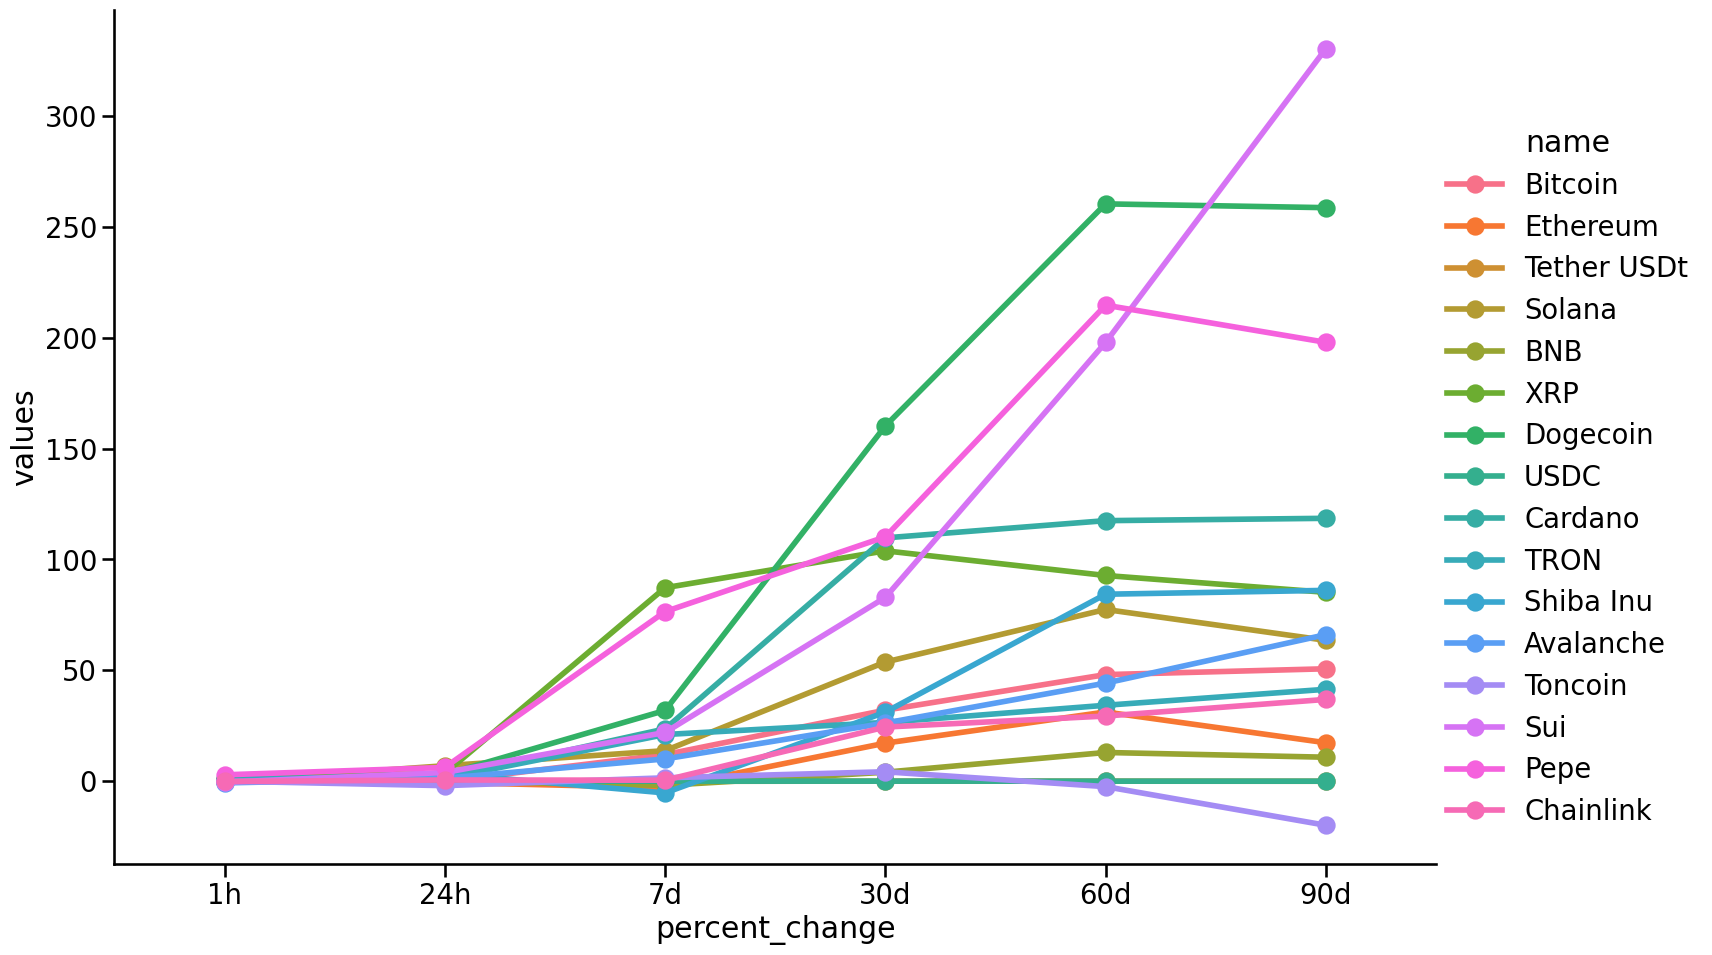

In [32]:
sns.catplot(
    x='percent_change', 
    y='values', 
    hue='name', 
    data=df7, 
    kind='point', 
    height=10,  # Chiều cao (mặc định là 5)
    aspect=1.5  # Tỉ lệ chiều rộng/chiều cao (mặc định là 1)
)
